In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option ('display.max_columns', None)
nameFile = 'd:\sampel data\BikeStore - Before Cleaning.csv'
data = pd.read_csv(nameFile, sep=";")
data.head()

,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
0,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
2,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
3,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
4,2,Jaqueline Cummings,Huntington Station,NY,2016-01-01,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Baldwin Bikes,Marcelene Boyer


In [18]:
header = ['Order ID', 'customer', 'city', 'state', 'order_date', 'total_units','revenue','product_name','category_name', 
          'brand_name','store_name','sales_rep']
data = pd.read_csv('d:\sampel data\BikeStore - Before Cleaning.csv', header=None, names=header, sep=";")
data.head()

,Order ID,customer,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep
0,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
2,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
3,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
4,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland


In [19]:
data.shape

(4722, 12)

### Data Quality Check

 1. Apakah ada features/kolom yang data tyoenya tidak sesuai?
 2. Apakah ada duplicate, missing values atau otliers? jika ada bagaimana mengatasinya?
 3. Apakah terdapat distribusi data yang tidak sesuai?


### Validation 1

 1. Feature atau kolom yang tidak sesuai dengan type data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       4722 non-null   int64  
 1   customer       4722 non-null   object 
 2   city           4722 non-null   object 
 3   state          4722 non-null   object 
 4   order_date     4722 non-null   object 
 5   total_units    4722 non-null   int64  
 6   revenue        4722 non-null   float64
 7   product_name   4722 non-null   object 
 8   category_name  4722 non-null   object 
 9   brand_name     4722 non-null   object 
 10  store_name     4722 non-null   object 
 11  sales_rep      4722 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 442.8+ KB


In [21]:
## Dari info data type diatas terdapat 1 kolom yang tidak sesuai dengan type datanya yaitu order_date (date bukan object)

data['order_date'] = pd.to_datetime(data['order_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4722 non-null   int64         
 1   customer       4722 non-null   object        
 2   city           4722 non-null   object        
 3   state          4722 non-null   object        
 4   order_date     4722 non-null   datetime64[ns]
 5   total_units    4722 non-null   int64         
 6   revenue        4722 non-null   float64       
 7   product_name   4722 non-null   object        
 8   category_name  4722 non-null   object        
 9   brand_name     4722 non-null   object        
 10  store_name     4722 non-null   object        
 11  sales_rep      4722 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 442.8+ KB


### Validation 2

 2. Duplicate, missing values dan outliers

### DUPLICATE


In [22]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4717    False
4718    False
4719    False
4720    False
4721    False
Length: 4722, dtype: bool

In [23]:
### Jika nilainya false berarti tidak ada kolom yang yang nilainya nya sama dengan kolom-kolom lain
data.duplicated().sum()

0

### Missing Values

In [24]:
data.isna().sum().sort_values(ascending=False)

Order ID         0
customer         0
city             0
state            0
order_date       0
total_units      0
revenue          0
product_name     0
category_name    0
brand_name       0
store_name       0
sales_rep        0
dtype: int64

### Outliers

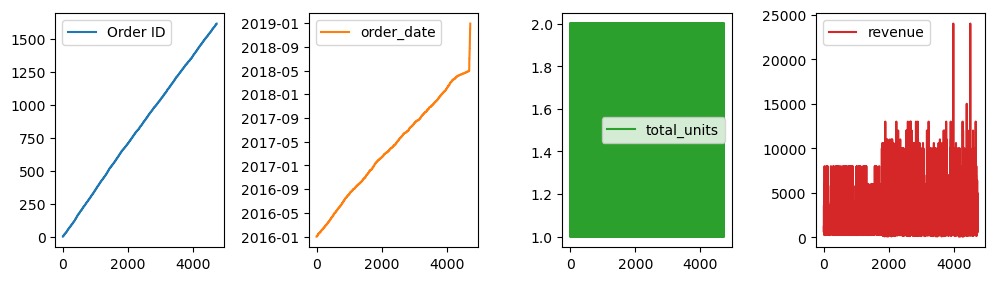

In [32]:
data_to_plot = data.select_dtypes(include=['float','int','datetime'])
data_to_plot.plot(subplots=True, layout=(4,4), kind='line', figsize=(12,14))
plt.subplots_adjust(wspace = 0.5);

In [33]:
### Kesimpulan tidak ada data yang tidak masuk akal (outliers)

### Validation 3

 3. Distribusi data

In [34]:
numeric = data_to_plot.columns
numeric

Index(['Order ID', 'order_date', 'total_units', 'revenue'], dtype='object')

C:\Users\muh.muhaimin nur\AppData\Local\Temp\ipykernel_11256\2407473842.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(bins=50, ax=ax, layout=(4,4), column=numeric)


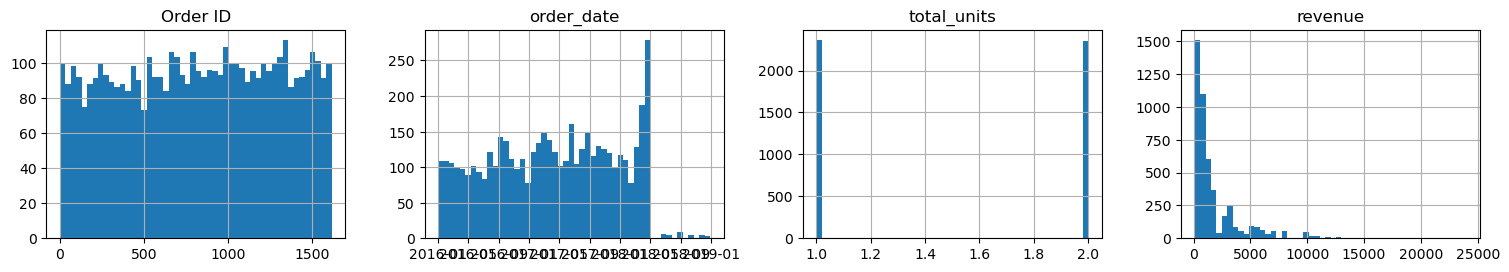

In [35]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

data.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

In [36]:
### Kesimpulan tidak terdapat distribusi data yang tidak masuk akal.

In [74]:
data.to_excel('bikestore.xlsx')

In [82]:
data.to_excel('bikestore.xlsx', index=False)

In [19]:
data.head()

,Order ID,customer,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep
0,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
2,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
3,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
4,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
